# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from MyAgent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env = gym.make('BipedalWalker-v2')
env.seed(0)
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0])

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
print(env.observation_space.shape)
print(env.observation_space.low)
print(env.observation_space.high)

(24,)
[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf]


In [4]:
print(env.action_space.shape)
print(env.action_space.low)
print(env.action_space.high)

(4,)
[-1. -1. -1. -1.]
[1. 1. 1. 1.]


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 100	Average Score: -120.99	Score: -130.10
Episode 200	Average Score: -114.15	Score: -107.78
Episode 300	Average Score: -105.05	Score: -107.55
Episode 400	Average Score: -108.81	Score: -101.90
Episode 500	Average Score: -109.07	Score: -108.03
Episode 600	Average Score: -111.98	Score: -106.65
Episode 700	Average Score: -115.25	Score: -109.30
Episode 800	Average Score: -112.67	Score: -99.388
Episode 900	Average Score: -113.72	Score: -109.02
Episode 1000	Average Score: -106.42	Score: -112.70
Episode 1100	Average Score: -117.49	Score: -117.86
Episode 1200	Average Score: -119.84	Score: -133.73
Episode 1300	Average Score: -122.54	Score: -121.51
Episode 1400	Average Score: -120.88	Score: -77.805
Episode 1500	Average Score: -85.28	Score: 40.85043
Episode 1600	Average Score: -116.77	Score: -125.35
Episode 1700	Average Score: -121.12	Score: -81.996
Episode 1800	Average Score: -30.96	Score: -108.244
Episode 1900	Average Score: -52.11	Score: -61.595
Episode 2000	Average Score: 39.88	Score: 

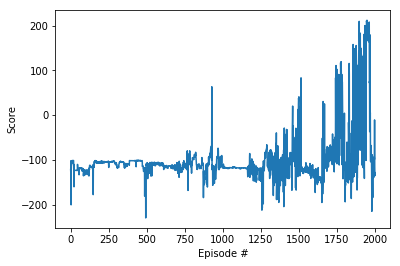

In [5]:
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_main.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_main.state_dict(), 'checkpoint_critic.pth')   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [6]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
agent.reset()   
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()

AttributeError: 'Agent' object has no attribute 'actor_local'

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  